Script to simulate hydrodynamics over a river section based on different discharges upstream.

The physical calculations are performed by the analytical model based on the Manning formula, for which stationar and uniform flow is assumed:

    Q=K S^0,5 A R^(2/3)

To do that first the geometric parameters (hydraulic radius, perimeter and surface area) are computed by the function conv_function_basic() based on the input of a criss section('data_bat_csv).

Since we are not always dealing with normal flow a backwatercurve is performed by the Bresse fit
    d = de + (d0-de)2^(L/105) with L05 - 0.24 de /S*d(d0/de)^0,75
    
By Bart Strijker, adapted by Koen Hiemstra. Koen Hiemstra applied a method for Transverse slope and Bedforms.


Version Frederik:
This is a concept model for PhD-research of the Rhine branches. In this case the river stretch Waal.



In [2]:
#In this cell all the needed packages in this script are imported:

import math
from numpy import *
import matplotlib.pyplot as plt
import csv
from scipy.optimize import fsolve,newton
import networkx as nx

In [3]:
#Physical parameters
g=9.81

## Define the parameters of the river system 

In [4]:
#Bathymetry river system: This is a file based on the data of a SOBEK-simulation in 2013 (provided by Max Schropp to Koen Hiemstra).
with open ('River_branches_data.csv') as f:   #Reading csv file with bathymetry data of the river branches
    reader = csv.reader(f, delimiter=';')
    base_list = list(reader)
    mylist=base_list[1:765]

# Define lists of parameters
    
    point=[]
    name=[]
    x=[]
    y=[]
    kms=[]
    waterlevels=[]
    waterlevels700=[]
    width_summerbed=[]
    level_summerbed=[]
    level_winterbed=[]
    chezy=[]
    nw=[]

    for row in mylist:
        point.append(row [0])
        name.append(row [1])
        x.append(row[2])
        y.append(row[3])
        kms.append(row[5])
        waterlevels.append(row [9])
        waterlevels700.append(row[8])
        width_summerbed.append(row[11])
        level_summerbed.append(row[21])
        level_winterbed.append(row[24])
        chezy.append(row[27])
        nw.append(row[29])

# Change items of list from strings to floating numbers or integer 
location = [int(i) for i in point]
X = [float(i) for i in x] #positie moet nog door 1000 worden gedeeld om oorspronkelijke coordinaten terug te krijgen
Xco = [X[n]/1000 for n in range (0,len(X))]
Y = [float(i) for i in y] #positie moet nog door 1000 worden gedeeld om oorspronkelijke coordinaten terug te krijgen
Yco = [Y[n]/1000 for n in range (0,len(Y))]
KM = [int(i) for i in kms]
Waterlevel = [int(i) for i in waterlevels] #waterlevels in centimeters
Waterlevels700 = [int(i) for i in waterlevels700]#waterlevels in centimeters
Width_summerbed = [int(i) for i in width_summerbed] # width in meter
Level_summerbed = [int(i) for i in level_summerbed] # NAP + centimeters
Level_winterbed = [int(i) for i in level_winterbed] # NAP + centimeters
Chezy = [int(i) for i in chezy]
N = [int(i) for i in nw]
nwaarde = [N[n]/100 for n in range (0,len(N))]

print(nwaarde)

[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.0

In [31]:
with open ('Meetpunten RWS.csv') as f:   #Reading csv file with bathymetry data of the river branches
    mreader = csv.reader(f, delimiter=';')
    mbase_list = list(mreader)
    metingen=mbase_list[2:10]
    
    wyssel=[]
    punten=[]
    
for row in metingen: 
    wyssel.append(row[4])
    punten.append(row[3])
    myssel = [int(i) for i in wyssel]
    meetpunten = [int(i) for i in punten]
    
    print(myssel, meetpunten)

[638] [881000]
[638, 519] [881000, 890700]
[638, 519, 434] [881000, 890700, 903000]
[638, 519, 434, 231] [881000, 890700, 903000, 929300]
[638, 519, 434, 231, 113] [881000, 890700, 903000, 929300, 944900]
[638, 519, 434, 231, 113, 55] [881000, 890700, 903000, 929300, 944900, 957000]
[638, 519, 434, 231, 113, 55, 25] [881000, 890700, 903000, 929300, 944900, 957000, 965200]
[638, 519, 434, 231, 113, 55, 25, -24] [881000, 890700, 903000, 929300, 944900, 957000, 965200, 994800]


In [6]:
# Define the different riverstretches of the system
# Bovenrijn = cell 0:8
# Waal = cell 9:195
# Pannerdensch kanaal = cell 196:220
# Nederrijn = cell 221:319
# Lek = cell 320:440
# Yssel = cell 441:669
# Keteldiep = cell 670:679

In [7]:
# A list of the distance along the river between the locations is determined based on the riverlocations and X/Y-coordinates.    
dKM=[KM[n]-KM[n-1] for n in range(1,len(KM))] #distance between the locations
dX=[Xco[n]-Xco[n-1] for n in range(1,len(Xco))]
dY=[Yco[n]-Yco[n-1] for n in range(1,len(Yco))]

#print(dKM)


## Define the hydraulic boundary conditions: incoming river discharge upstream of the river and the downstream water level based on a Q-h relation. 

In [8]:
# This part describes the hydraulic boundary conditions: incoming river discharge upstream of the river and the downstream water level based on a Q-h relation.
# The upstream boundary condition is the incoming riverdischarge at Lobith. At bifurcation Pannerdensche kop a discharge distribution is applied 
# for the discharges into the Waal and the Pannerdensch channel. At the second bifurcation Ysselkop also a discharge distribution to the Nederrijn
# and the Yssel is implemented based on the information provided RWS Oost-Nederland. Information from year 2000 based on measurements 
# of the year 1998 & 1999 for closed barriers in the Nederrijn.

import csv
with open ('DD_Rhinebranches.csv') as f:   #Reading csv file with bathymetry data of the river Waal
    reader = csv.reader(f, delimiter=';')

# Define lists of river discharges
    qlobith=[]
    qwaal=[]
    qpkan=[]
    qneder=[]
    qyssel=[]
    qtotal=[]
        
    for row in reader:    
          
        qlobith.append(row[0]) # incoming discharge Lobith
        qwaal.append(row[1]) # discharge Waal
        qpkan.append(row[2]) # discharge Pannerdensch kanaal
        qneder.append(row[3]) #discharge Nederrijn
        qyssel.append(row[4]) #discharge Yssel

# Change items of list from strings to floating numbers or integer 
Qlob = [int(i) for i in qlobith] 
Qwaal = [int(i) for i in qwaal] 
Qpkan = [int(i) for i in qpkan] 
Qneder = [int(i) for i in qneder] 
Qyssel = [int(i) for i in qyssel]  

#print(Qyssel)    

Qbovenrijn 700
QPannerdensch Kanaal 117
QWaal 583
QNederrijn 11
QYssel 106


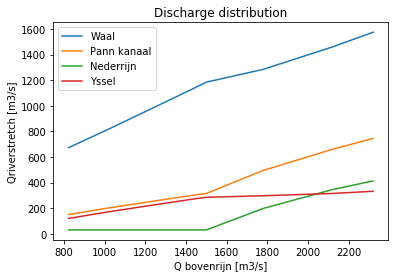

In [9]:
# In this cell the discharge distribution is defined based on the given river discharge of the Bovenrijn.
waal, = plt.plot(Qlob, Qwaal, label='Waal') 
pkan, = plt.plot(Qlob, Qpkan, label='Pann kanaal')               
neder, = plt.plot(Qlob, Qneder, label='Nederrijn') 
yssel, = plt.plot(Qlob, Qyssel, label='Yssel')
plt.title('Discharge distribution')
plt.legend(handles=[waal, pkan, neder, yssel])

plt.ylabel('Qriverstretch [m3/s]')
plt.xlabel('Q bovenrijn [m3/s]')

# River discharge division in case of closed barriers in the range of QLobith=823-1430 m3/s
qbovenrijn=700

if qbovenrijn==700:
    qpkan=117
    qwaal=583
    qnederrijn=11
    qyssel=106
    bovenrijn_ben=633.2
    pankan_ben=612.7
    waal_ben=69
    neder_ben=600
    yssel_ben=-35
elif qbovenrijn==823:
    qpkan=150
    qwaal=673
    qnederrijn=30
    qyssel=120
    bovenrijn_ben=721.8
    pankan_ben=697.8
    waal_ben=69
    neder_ben=271.6
    yssel_ben=-32.5        
elif qbovenrijn==1013:
    qpkan=200
    qwaal=813
    qnederrijn=30
    qyssel=170
    pankan_ben=697.8
    waal_ben=69
    neder_ben=271.6
    yssel_ben=-32.5
else:
    print('No values.')
    
print('Qbovenrijn',qbovenrijn)
print('QPannerdensch Kanaal',qpkan)
print('QWaal',qwaal)
print('QNederrijn',qnederrijn)
print('QYssel',qyssel)

In [10]:
#Flip arrays for calculation starting at the downstream location of the riverstretch
Xco_flip=Xco[::-1]
Yco_flip=Yco[::-1]
KM_flip=KM[::-1]
dKM_flip=dKM[::-1]
Waterlevel_flip=Waterlevel[::-1]
Waterlevel700_flip=Waterlevels700[::-1]
Width_summerbed_flip=Width_summerbed[::-1]
Level_summerbed_flip=Level_summerbed[::-1]
Level_winterbed_flip=Level_winterbed[::-1] 
Chezy_flip=Chezy[::-1]
nwaarde_flip=nwaarde[::-1]

# Define the different riverstretches of the system
# Bovenrijn = cell 671:681 
xbovenrijn = KM_flip[671:681]
dKMbovenrijn = dKM_flip[671:681]
wlbovenrijn = Waterlevel700_flip[671:681]
wlbovenrijn700 = Waterlevel_flip[671:681]
WSbovenrijn = Width_summerbed_flip [671:681]
LSbovenrijn = Level_summerbed_flip[671:681]
LWbovenrijn = Level_winterbed_flip[671:861]

# Waal1 = cell 484:672
xwaal = KM_flip[484:670]
dKMwaal = dKM_flip[484:670]
wlwaal = Waterlevel_flip[484:670]
wlwaal700 = Waterlevel700_flip[484:670]
WSwaal = Width_summerbed_flip[484:670]
LSwaal = Level_summerbed_flip[484:670]
LWwaal = Level_winterbed_flip[484:670]
Chezywaal = Chezy_flip[484:670]

# Pannerdensch kanaal = cell 460:484
xpankan = KM_flip[460:484]
dKMpankan = dKM_flip[460:484]
wlpankan = Waterlevel_flip[460:484]
wlpankan700 = Waterlevel700_flip[460:484]
WSpankan = Width_summerbed_flip[460:484]
LSpankan = Level_summerbed_flip[460:484]
LWpankan = Level_winterbed_flip[460:484]

# Nederrijn = cell 360:460
xneder = KM_flip[434:459] #deel tot aan eerste sluis bovenstrooms van de Nederrijn is meegenomen in model
dKMneder = dKM_flip[434:459]
wlneder = Waterlevel_flip[434:459]
wlneder700 = Waterlevel700_flip[434:459]
WSneder = Width_summerbed_flip[434:459]
LSneder = Level_summerbed_flip[434:459]
LWneder = Level_winterbed_flip[434:459]

# Lek = cell 239:360 
xlek = KM_flip[239:360]
dKMlek = dKM_flip[239:360]
wllek = Waterlevel_flip[239:360]
wllek700 = Waterlevel700_flip[239:360]
WSlek = Width_summerbed_flip[239:360]
LSlek = Level_summerbed_flip[239:360]
LWlek = Level_winterbed_flip[239:360]

# Yssel = cell 10:239
xyssel = KM_flip[62:300]
dKMyssel = dKM_flip[62:300]
wlyssel = Waterlevel_flip[62:300]
wlyssel700 = Waterlevel700_flip[62:300]
WSyssel = Width_summerbed_flip[62:300]
LSyssel = Level_summerbed_flip[62:300]
LWyssel = Level_winterbed_flip[62:300]
Chezyyssel = Chezy_flip[62:300]
nwaarde_yssel = nwaarde_flip[62:300]

In [11]:
#print(len(dKMyssel))
#print(nwaarde_yssel)

238
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,

## Manning formula calculations to determine normal and critical flow depth.

In [12]:
#Channel slope
#According to De Vries (1993), Sieben (2009), Sloff et al.(2014) and Blom (2016), the channel slope of the Waal river is 1.0*10^-4
#and 1.2*10^-4.

S0=0.00012 #bed slope of the rivert
k=1 #roughnesse dependend on discharge
#Roughness of main channel
n=0.0295 
n2=0.08
n3=0.065
C0=1

#Riverstretch Waal & Yssel

#normal flow
def Manning (y, qwaal, b, S, n, k, m):
    A=(b+m*y)*y # conveyance surface area [m2] =>(width*depth)
    R=A/(b+2*y*(1+m**2)**(1/2)) #hydraulic radius [-]
    return qwaal-(C0/n)*A*R**(2/3)*S**(1/2)
m=0

#normal flow
def Manning (y, qyssel, b, S, n, k, m):
    A=(b+m*y)*y # conveyance surface area [m2] =>(width*depth)
    R=A/(b+2*y*(1+m**2)**(1/2)) #hydraulic radius [-]
    return qyssel-(C0/n)*A*R**(2/3)*S**(1/2)
m=0

#normal flow depth in steady flow is also upstream water dept of river stretch  
y0_waal = zeros(len(WSwaal))
y0_yssel = zeros(len(WSyssel))

y0_waal = [fsolve(Manning,1, args=(qwaal, WSwaal[i], S0, 0.09, C0, m)) for i in range (0, len(WSwaal))] 
y0_yssel = [fsolve(Manning,1, args=(qyssel, WSyssel[i], S0, nwaarde_yssel[i], C0, m)) for i in range (0, len(WSyssel))] 

#bovenstroomse waterstand van een traject dx tov NAP [m]=h_bov_e
waterlevels_normalwaal =zeros(len(y0_waal))
waterlevels_normalyssel =zeros(len(y0_waal))

waterlevels_normalwaal = [y0_waal[i]*100+LSwaal[i] for i in range(0, len(y0_waal))] 
waterlevels_normalyssel = [y0_yssel[i]*100+LSyssel[i] for i in range(0, len(y0_yssel))] 

In [13]:
print(y0_yssel[2],LSyssel[2],waterlevels_normalyssel[2])

[17.74135157] -600 [1174.13515701]


## Bresse equation

Based on the Bresse equation the backwatercurve based on the downstream water level can be determined.

In [14]:
# Riverstretch Waal and Yssel
#chezy-coefficient
Cwaal=44
Cyssel=34

#discharge per unit width for each river stretch
qw = [qwaal/WSwaal[n] for n in range (0, len(dKMwaal))] 
qy = [qyssel/WSyssel[n] for n in range (0,len(dKMyssel))] 

#equilibrium water depthfor each river stretch
h_eq_waal = [(qw[n]**2/((Chezywaal[n]**2)*S0))**(1/3)for n in range (0, len(dKMwaal))]
h_eq_yssel = [(qy[n]**2/((Chezyyssel[n]**2)*S0))**(1/3)for n in range (0,len(dKMyssel))]
waterlevels_eqyssel = [h_eq_yssel[i]*100+LSyssel[i] for i in range(0,len(dKMyssel))] 

#L_05 = [(0.24*cor_h_eq[n]/S0)*(y0[n]/cor_h_eq[n])**(4/3)for n in range (0, len(dKMwaal))] 

#half length for each river stretch
L_05 = [(0.24*h_eq_waal[n]/S0)*(y0_waal[n]/h_eq_waal[n])**(4/3)for n in range (0, len(dKMwaal))] 
L_05_normal_waal = [(0.24*y0_waal[n]/S0)*(y0_waal[n-1]/y0_waal[n])**(4/3)for n in range (0, len(dKMwaal))]
L_05_normal_yssel = [(0.24*h_eq_yssel[n]/S0)*(h_eq_yssel[n-1]/h_eq_yssel[n])**(4/3)for n in range (0, len(dKMyssel))]

#bodemligging
dd0_waal = [waterlevels_normalwaal[i+1]-waterlevels_normalwaal[i]+dKMwaal[i]*S0 for i in range(0,185)] 
dd0_yssel = [waterlevels_normalyssel[i+1]-waterlevels_normalyssel[i]+dKMyssel[i]*S0 for i in range(0,237)] 


In [15]:
print(h_eq_yssel[0],L_05_normal_yssel[0],dd0_yssel[0])

8.295453744115315 2967.3315235823707 [-1726.17231299]


In [35]:
# Riverstretch Waal 

hflip_waal = zeros(len(dKMwaal))

#d0_waal = zeros(len(LSwaal))

for i in range (0,185):
    hflip_waal[0]=69
    
    #water level at location x+1  
    hflip_waal[i+1] = waterlevels_normalwaal[i] + (hflip_waal[i]-waterlevels_normalwaal[i]+S0*dKMwaal[i])*(1/2)**(dKMwaal[i]/L_05_normal_waal[i])
    
    waterlevels_waal=hflip_waal#[::-1]
    
    diff_waal = zeros(len(waterlevels_waal))
    diff_waal = [waterlevels_waal[i]-wlwaal[i] for i in range(0,185)]


    #hflip[i+1] = dflip[i] + cor_bl_sum[i]
    #h_wl = hflip[::-1]
    #d0[i+1]=dx_flip[i]*S#d0[i]+

    #dflip[i+1] = y0[i] + (dflip[i]-y0[i])*(1/2)**(dx_flip[i]/L_05_normal[i])#depth at location x+1
    #dd0[i] = [waterlevels_normal[i]-waterlevels[i-1]+dx_flip[i]*S 
    
    #hflip[i+1] = waterlevels_normal[i+1] + (dd0[i]*2)**(dx_flip[i]/L_05_normal[i])#water level at location x+1
    


In [36]:
#print(L_05_normal_waal)

In [56]:
# Riverstretch IJssel
hflip_yssel = zeros(len(dKMyssel))
waterlevels_yssel=zeros(len(dKMyssel))
for i in range (0,237):
    hflip_yssel[0]=-1750
    hflip_yssel[i+1] = waterlevels_normalyssel[i] + (hflip_yssel[i]-waterlevels_normalyssel[i])*(1/2)**(dKMyssel[i]/L_05_normal_yssel[i])#water level at location x+1
    
    waterlevels_yssel[i]=hflip_yssel[i]#[::-1]
    
    diff_yssel = zeros(len(waterlevels_yssel))
    diff_yssel = [(waterlevels_yssel[i]-wlyssel[i])/100 for i in range(0,237)]


In [57]:
#print(dflip_yssel)

### Module to determine the width-average waterdepth

In [58]:
depth_waal = [(waterlevels_waal[i]-LSwaal[i])/280 for i in range(0,185)]
depth_yssel = [(waterlevels_yssel[i]-LSyssel[i])/280 for i in range(0,237)]

## Plotting figures of results

Text(0.5,0,'distance, x [m]')

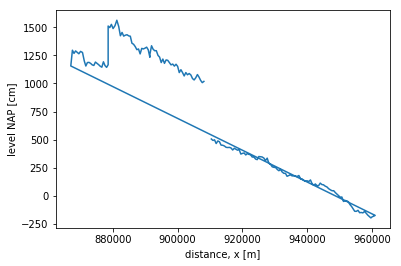

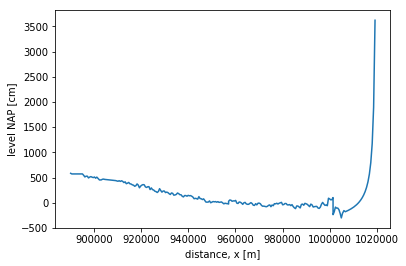

In [59]:
#This cell is added to plot figures based on the determined variables.
plt.figure(1)
plt.plot(xwaal, waterlevels_normalwaal)
plt.ylabel('level NAP [cm]')
plt.xlabel('distance, x [m]')

plt.figure(2)
plt.plot(xyssel, waterlevels_normalyssel)
plt.ylabel('level NAP [cm]')
plt.xlabel('distance, x [m]')

Text(0.5,0,'distance, x [m]')

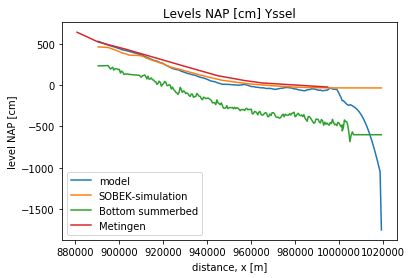

In [62]:
# Plot of riverstretch Yssel
plt.figure(4)
#normal, = plt.plot(xyssel, waterlevels_normalyssel, label='norm flow')
model, = plt.plot(xyssel[0:237], waterlevels_yssel[0:237], label='model') 
SOBEK, = plt.plot(xyssel[0:237], wlyssel700[0:237], label='SOBEK-simulation')
bottom, = plt.plot(xyssel[0:237], LSyssel[0:237], label='Bottom summerbed')
meting, = plt.plot(meetpunten[0:8], myssel[0:8], label='Metingen')
plt.title('Levels NAP [cm] Yssel')
plt.legend(handles=[model, SOBEK, bottom, meting])
plt.ylabel('level NAP [cm]')
plt.xlabel('distance, x [m]')